# Classifying newswires: Multiclass Classification Example

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [4]:
train_data.shape

(8982,)

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_text(text):
    # Offset by 3 because 0, 1, and 2 are reserved for padding, start, and unknown
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

decode_text(train_data[10])

557056/550378 [==============================] - 1s 1us/step


'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

## Preparing the data

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimention=46):
    results = np.zeros((len(labels), dimention))
    for i, l in enumerate(labels):
        results[i, l] = 1
    return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Same in keras

In [10]:
from keras import utils

one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

## Build the model

In [12]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000, )),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Validate the model

In [13]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 289us/step - loss: 2.5315 - acc: 0.4952 - val_loss: 1.7233 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.4499 - acc: 0.6874 - val_loss: 1.3496 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 175us/step - loss: 1.1000 - acc: 0.7638 - val_loss: 1.1719 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.8725 - acc: 0.8163 - val_loss: 1.0771 - val_acc: 0.7610
Epoch 5/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.7056 - acc: 0.8468 - val_loss: 0.9850 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.5688 - acc: 0.8795 - val_loss: 0.9407 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.4617 - acc: 0.9030 - val_loss: 0.9097 - val_acc: 0.8010


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

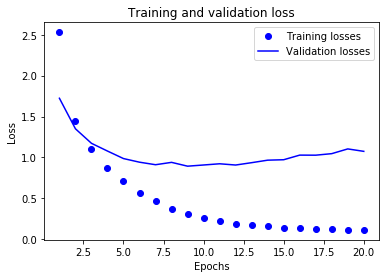

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  

loss_values = history_dict["loss"]
val_loss_values = history_dict['val_loss']

epochs = np.arange(1, 21, 1)

plt.plot(epochs, loss_values, 'bo', label='Training losses')
plt.plot(epochs, val_loss_values, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

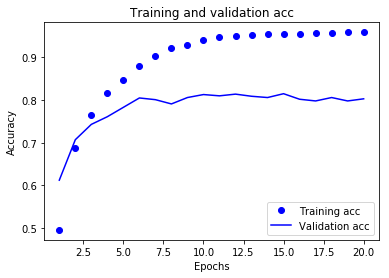

In [18]:
acc_values = history_dict["acc"]
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000, )),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


model.fit(X_train, one_hot_train_labels, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 2s 212us/step - loss: 2.6663 - acc: 0.5239
Epoch 2/9
8982/8982 [==============================] - 1s 131us/step - loss: 1.4153 - acc: 0.7135
Epoch 3/9
8982/8982 [==============================] - 1s 133us/step - loss: 1.0445 - acc: 0.7838
Epoch 4/9
8982/8982 [==============================] - 1s 145us/step - loss: 0.8261 - acc: 0.8253 1s - loss: 0.92
Epoch 5/9
8982/8982 [==============================] - 1s 126us/step - loss: 0.6586 - acc: 0.8577
Epoch 6/9
8982/8982 [==============================] - 1s 127us/step - loss: 0.5304 - acc: 0.8851
Epoch 7/9
8982/8982 [==============================] - 1s 132us/step - loss: 0.4241 - acc: 0.9099
Epoch 8/9
8982/8982 [==============================] - 1s 145us/step - loss: 0.3474 - acc: 0.9275
Epoch 9/9
8982/8982 [==============================] - 1s 130us/step - loss: 0.2928 - acc: 0.9361


NameError: name 'y_test' is not defined

In [24]:
results = model.evaluate(X_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 160us/step


[0.9475443089316173, 0.7965271593414028]

## Train model without one hot encoding labels

In [27]:

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000, )),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


model.fit(X_train, np.asarray(train_labels).astype(np.int32), epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 2s 199us/step - loss: 2.6436 - acc: 0.5216
Epoch 2/9
8982/8982 [==============================] - 1s 130us/step - loss: 1.3984 - acc: 0.7123
Epoch 3/9
8982/8982 [==============================] - 1s 135us/step - loss: 1.0282 - acc: 0.7798
Epoch 4/9
8982/8982 [==============================] - 1s 141us/step - loss: 0.7982 - acc: 0.8312
Epoch 5/9
8982/8982 [==============================] - 1s 129us/step - loss: 0.6363 - acc: 0.8648
Epoch 6/9
8982/8982 [==============================] - 1s 128us/step - loss: 0.5086 - acc: 0.8939
Epoch 7/9
8982/8982 [==============================] - 1s 144us/step - loss: 0.4068 - acc: 0.9130
Epoch 8/9
8982/8982 [==============================] - 1s 136us/step - loss: 0.3347 - acc: 0.9279
Epoch 9/9
8982/8982 [==============================] - 1s 129us/step - loss: 0.2779 - acc: 0.9398
